# Jair Sánchez Sierra

In [ ]:
import numpy as np
import torch as pt
import sympy as sp
import scipy as sc
import matplotlib.pyplot as plt


# Autovalores, autovectores, diagonalización

Una matriz es diagonalizable cuando es semejante a una matriz diagonal. Esto significa que mediante un cambio de base, podemos reducir la matriz original a una forma diagonal. Para que una matriz sea diagonalizable, debe cumplir las siguientes condiciones:

**Autovectores linealmente independientes**: Una matriz $(A \in \mathbb{R}^{n \times n})$ es diagonalizable si y solo si tiene (n) autovectores linealmente independientes. Esto significa que los autovectores asociados a los autovalores deben ser linealmente independientes.

**Semejanza**: Existe una matriz invertible (P) tal que ($P^{-1}AP = D$), donde (D) es una matriz diagonal formada por los autovalores de (A).

La diagonalización es un proceso que transforma una matriz cuadrada ( A ) en una matriz diagonal ( D ) mediante una matriz invertible ( P ), tal que:

$P^{-1}AP = D$

La matriz diagonal ( D ) contiene los autovalores de ( A ) en la diagonal principal, y las columnas de ( P ) son los autovectores correspondientes a esos autovalores.

## Numpy

Autovalores: [6.16424794 1.60861762 3.22713444]
Autovectores:
 [[-0.6611152   0.56181831 -0.49727948]
 [-0.7154086  -0.6717612   0.19216509]
 [-0.2260912   0.48280128  0.84604119]]


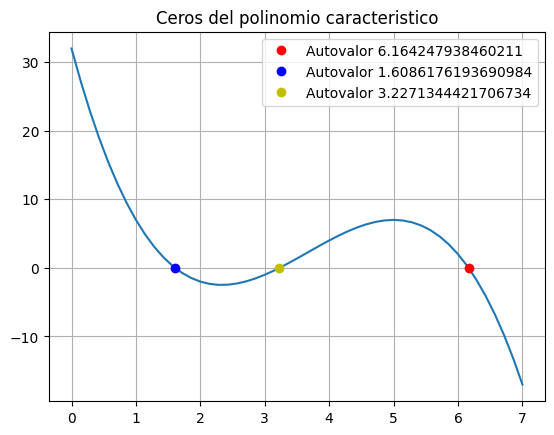

In [ ]:
# Definir una matriz 3x3
A = np.array([[4, 2, 0],
              [2, 4, 1],
              [0, 1, 3]])

# Calcular autovalores y autovectores
autovalores, autovectores = np.linalg.eig(A)
U = autovectores.copy()
print("Autovalores:", autovalores)
print("Autovectores:\n", autovectores)


d = lambda x: ((4 -x)**2)*(3-x) - (4-x)- 4* (3-x) #polinomio cracateristico
x = np.linspace(0,7)

dd_1 = sc.optimize.newton(d,6)
dd_2 = sc.optimize.newton(d,1)
dd_3 = sc.optimize.newton(d,3)
#print(dd_1,dd_2,dd_3)

plt.title("Ceros del polinomio caracteristico")
plt.plot(x,d(x))
plt.plot((dd_1),d(dd_1),"ro",label=f"Autovalor {dd_1}")
plt.plot((dd_2),d(dd_2),"bo",label=f"Autovalor {dd_2}")
plt.plot((dd_3),d(dd_3),"yo",label=f"Autovalor {dd_3}")
plt.legend()
plt.grid()

In [ ]:
from sympy import roots
x =sp.Symbol("x")
y = sp.Symbol("y")
z = sp.Symbol("z")
A_1 = np.array([[4-dd_1, 2, 0],
              [2, 4-dd_1, 1],
              [0, 1, 3-dd_1]])

v = np.array([x,y,z])

V = sp.Matrix(v)
a = sp.Matrix(A_1)

autovalores, autovectores = np.linalg.eig(A)

print("Autovalores:", autovalores)
print("Autovectores:\n", autovectores)

Autovalores: [6.16424794 1.60861762 3.22713444]
Autovectores:
 [[-0.6611152   0.56181831 -0.49727948]
 [-0.7154086  -0.6717612   0.19216509]
 [-0.2260912   0.48280128  0.84604119]]


### Matriz Diagonal

In [ ]:
D = np.linalg.inv(U)@A@autovectores
np.set_printoptions(suppress=True, precision=6)
D

array([[ 6.164248,  0.      , -0.      ],
       [-0.      ,  1.608618, -0.      ],
       [ 0.      , -0.      ,  3.227134]])

In [ ]:
np.set_printoptions(suppress=True, precision=6)


## Actividad:

Construir un programa que permita elevar una matriz a una potencia.


La exponencial de una matriz ( $e^A$) se define como la serie de Taylor de la función exponencial evaluada en la matriz ( A ):


\begin{equation}
e^A = I + A + \frac{1}{2!}A^2 + \frac{1}{3!}A^3 + \cdots = \sum_{n=0}^{\infty} \frac{1}{n!}A^n
\end{equation}


Donde ( $e^D$ ) es simplemente la matriz exponencial de la matriz diagonal ( D ), que es fácil de calcular porque solo implica elevar los autovalores de (A) a la potencia de (e):



\begin{equation}
e^A = Pe^DP^{-1}
\end{equation}


Exponencial de una matriz diagonal

\begin{equation}
e^D = \begin{bmatrix}
e^{\lambda_1} & 0 & \cdots & 0 \\
0 & e^{\lambda_2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & e^{\lambda_n}
\end{bmatrix}
\end{equation}




# Autovalores y autovectores complejos

In [ ]:
theta=-np.pi/4
A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])

# Calcular autovalores y autovectores
autovalores, autovectores = np.linalg.eig(A)
U = autovectores.copy()
print("Autovalores:", autovalores)
print("Autovectores:\n", autovectores)

D = np.linalg.inv(U)@A@U
np.set_printoptions(suppress=True, precision=6)
D

In [ ]:
np.exp(D)

### Sympy

In [ ]:
from sympy import Matrix, simplify

# Definir una matriz 3x3
A = Matrix([[4, 2, 0],
            [2, 4, 1],
            [0, 1, 3]])

# Calcular autovalores y autovectores
autovalores = A.eigenvals()
autovectores = A.eigenvects()

# Simplificar autovalores y autovectores
autovalores_simplificados = {simplify(l): m for l, m in autovalores.items()}
autovectores_simplificados = [(simplify(l), m, [simplify(v) for v in vs]) for l, m, vs in autovectores]

print("Autovalores simplificados:", autovalores_simplificados)
print("Autovectores simplificados:\n", autovectores_simplificados)


In [ ]:
autovalores_simplificados

# Pytorch

Definción de una matrix de tres formas:
Hasta ahora sabemos definir matrices como objetos de numpy y objetos de sympy, en la actualidad, el rápido crecimiento de las unidades de procesamiento gráfico GPU,  permite definir otro tipo de objetos que pueden acelerar el computo computacional.


- Como objeto de numpy
- Como objeto de sympy
- Como objeto de pytorch


La velocidad de ejecución entre PyTorch y Numpy puede variar dependiendo del tamaño de los datos y si se está utilizando o no la aceleración por GPU. Para operaciones con matrices pequeñas y cálculos que no requieren de la paralelización de una GPU, Numpy puede ser más rápido porque opera directamente en la CPU y la memoria principal. Sin embargo, para matrices grandes y operaciones que pueden ser paralelizadas, PyTorch con soporte de GPU puede ser significativamente más rápido.

Comparativa de comandos de ejecución entre pytorch, numpy  y sympy


| Operación | PyTorch | Numpy | SymPy |
|-----------|---------|-------|-------|
| Creación de una matriz | `torch.tensor([[1, 2], [3, 4]])` | `np.array([[1, 2], [3, 4]])` | `Matrix([[1, 2], [3, 4]])` |
| Transposición de una matriz | `torch.transpose(A, 0, 1)` | `A.T` o `np.transpose(A)` | `A.T` |
| Multiplicación de matrices | `torch.matmul(A, B)` | `np.dot(A, B)` o `A @ B` | `A * B` |
| Inversa de una matriz | `torch.inverse(A)` | `np.linalg.inv(A)` | `A**-1` |
| Determinante de una matriz | `torch.det(A)` | `np.linalg.det(A)` | `A.det()` |
| Autovalores y autovectores | `torch.eig(A, eigenvectors=True)` | `np.linalg.eig(A)` | `A.eigenvals()`, `A.eigenvects()` |



Ejemplo básico del comparativo de un problema de algebra lineal, rotación de un vector:

In [ ]:

def matrixA(theta, tipo="numpy"):
  if(tipo=="np"):
    return np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])
  elif(tipo=="sp"):
    return np.array([[sp.cos(theta),-sp.sin(theta)],[sp.sin(theta), sp.cos(theta)]])

  elif(tipo=="pt"):
    return pt.tensor([[np.cos(theta),-np.sin(theta)],[np.sin(theta), np.cos(theta)]])

  else:

    print("Define el tipo de variable que desea")


In [ ]:
x = sp.Symbol("x")
M = sp.Matrix(matrixA(np.pi/4, tipo="sp"))
M

In [ ]:
x=np.pi/4
M = matrixA(x, tipo="np")
M

In [ ]:
matrixA(x, tipo="pt")
M

Actividad: Resolver el problema de la potencia de una matriz empleando pytorch, construir.